<a href="https://colab.research.google.com/github/itsmenisha/Facial-Expression-Recognition/blob/main/Face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face expression recognition**

## **1. Link your Kaggle account to Colab**

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishakirangnawaly","key":"d043e46d3dd6c2760cf77830a2d33c9f"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile

with zipfile.ZipFile("fer2013.zip", 'r') as zip_ref:
    zip_ref.extractall("face_data")

In [8]:
import os
os.listdir("face_data")


['test', 'train']

## **2. Import Libraries**

In [9]:
!pip install keras-preprocessing
!pip install tensorflow


In [10]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

## **3. Create DataFrame**

In [11]:
TRAIN_DIR = './face_data/train'
TEST_DIR = './face_data/test'

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        folder_path = os.path.join(dir, label)
        if os.path.isdir(folder_path):
            for imagename in os.listdir(folder_path):
                image_paths.append(os.path.join(folder_path, imagename))
                labels.append(label)
            print(label, "completed")
    return image_paths, labels

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

neutral completed
angry completed
disgust completed
sad completed
surprise completed
fear completed
happy completed
neutral completed
angry completed
disgust completed
sad completed
surprise completed
fear completed
happy completed


## **4. Extract Features**

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

x_train = train_features / 255.0
x_test = test_features / 255.0

  0%|          | 0/28709 [00:00<?, ?it/s]

  0%|          | 0/7178 [00:00<?, ?it/s]

## **5. Encode Labels**

In [13]:
le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)


## **6. Build and Train CNN**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Dense, Flatten, GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()


model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Classifier
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

# Compile
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,215,431 (4.64 MB)

 Trainable params: 1,213,639 (4.63 MB)

 Non-trainable params: 1,792 (7.00 KB)

## **7. Train the Model**

In [15]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# testing if the GPU works


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
history = model.fit(
    x_train, y_train,
    batch_size=130,
    epochs=150,
    validation_data=(x_test, y_test)
)

Epoch 1/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.1960 - loss: 3.3102 - val_accuracy: 0.1737 - val_loss: 3.0115
Epoch 2/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2742 - loss: 2.7696 - val_accuracy: 0.2141 - val_loss: 2.7995
Epoch 3/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.3228 - loss: 2.6410 - val_accuracy: 0.3614 - val_loss: 2.5289
Epoch 4/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.3636 - loss: 2.5451 - val_accuracy: 0.4055 - val_loss: 2.4567
Epoch 5/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.3812 - loss: 2.4770 - val_accuracy: 0.4363 - val_loss: 2.3670
Epoch 6/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.4017 - loss: 2.4226 - val_accuracy: 0.4390 - val_loss: 2.3609
Epoch 7/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.4233 - loss: 2.3575 - val_accuracy: 0.4628 - val_loss: 2.2467
Epoch 8/150
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.4313 - loss: 

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6242 - loss: 1.8514
Accuracy: 65.44%


In [39]:

model.save('emotiondetector.keras')


In [40]:
from google.colab import files

files.download('emotiondetector.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
labels = le.classes_

def show_prediction(image_path):
    img = load_img(image_path, color_mode='grayscale')
    arr = np.array(img).reshape(1,48,48,1)/255.0
    pred = model.predict(arr)
    pred_label = labels[pred.argmax()]

    plt.imshow(arr.reshape(48,48), cmap='gray')
    plt.title(f"Predicted: {pred_label}")
    plt.axis('off')
    plt.show()


In [21]:
print(le.classes_)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']



## **8. Testing the Model**

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a dataframe for validation images
validation = pd.DataFrame()
validation['image'], validation['label'] = createdataframe(TEST_DIR)  # use TEST_DIR instead

def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

label_names = ['angry','disgust','fear','happy','neutral','sad','surprise']


neutral completed
angry completed
disgust completed
sad completed
surprise completed
fear completed
happy completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original: angry, Model prediction: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Original: angry, Model prediction: fear


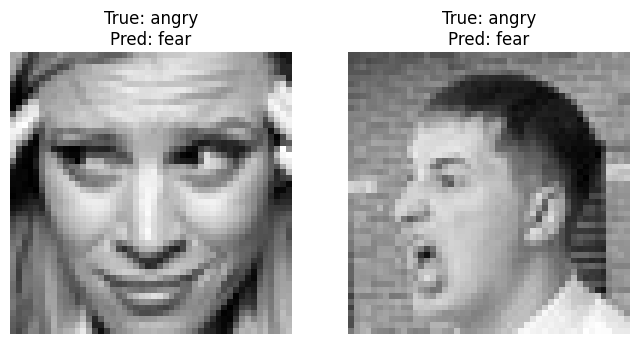

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original: disgust, Model prediction: disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Original: disgust, Model prediction: disgust


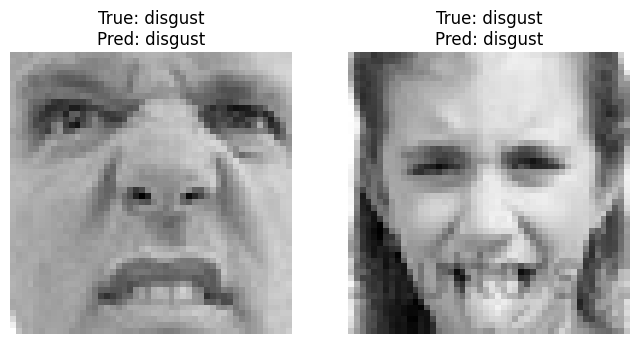

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Original: fear, Model prediction: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original: fear, Model prediction: fear


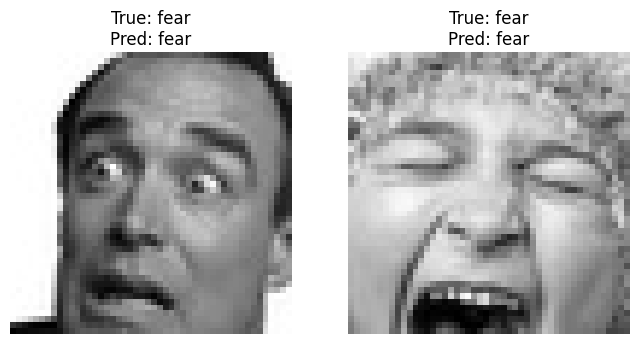

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Original: happy, Model prediction: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Original: happy, Model prediction: happy


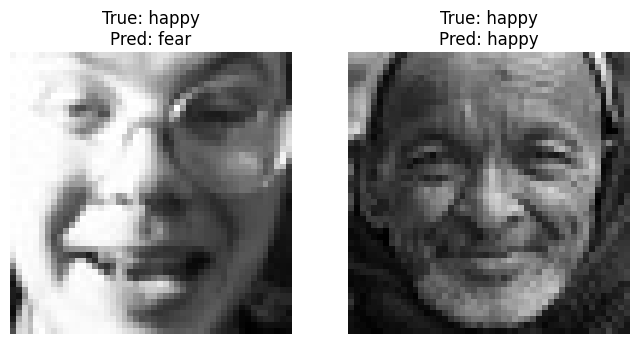

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Original: neutral, Model prediction: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original: neutral, Model prediction: neutral


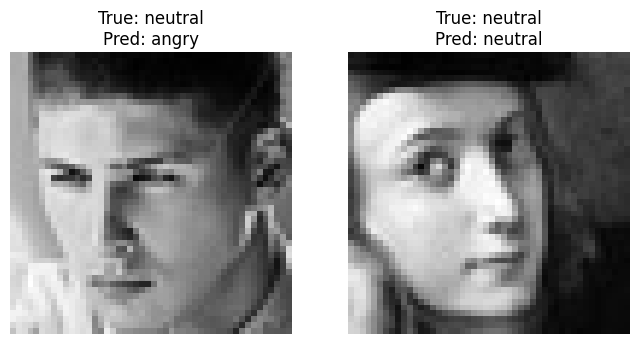

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Original: sad, Model prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Original: sad, Model prediction: sad


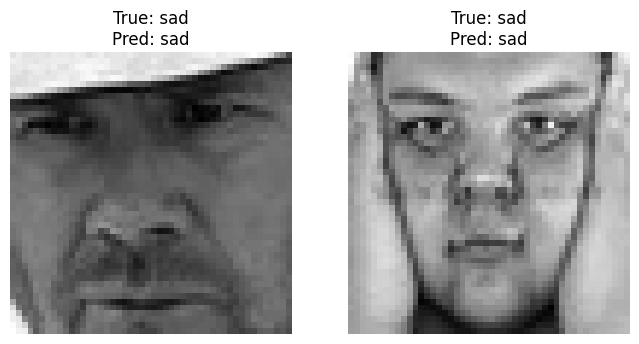

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Original: surprise, Model prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Original: surprise, Model prediction: neutral


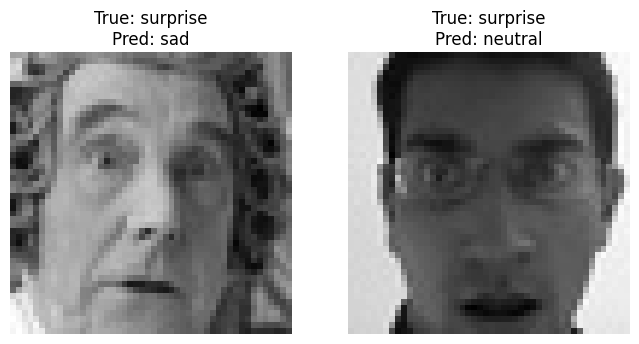

In [24]:
import matplotlib.pyplot as plt

# Show 2 random images per emotion horizontally
for lbl in label_names:
    subset = validation[validation['label'] == lbl].sample(2)  # random 2 images

    plt.figure(figsize=(8, 4))

    for i, (idx, row) in enumerate(subset.iterrows()):
        img_path = row['image']
        true_label = row['label']

        img = ef(img_path)
        pred = model.predict(img)
        pred_label = label_names[pred.argmax()]

        print(f"Original: {true_label}, Model prediction: {pred_label}")

        plt.subplot(1, 2, i+1)
        plt.imshow(img.reshape(48,48), cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')

    plt.show()


There are some images for which the model does not predict the correct label. This occurs because the model has not fully learned to distinguish all subtle differences between emotions. As we know, no model is perfect. To address this, the model was trained again on the same dataset. This further training, also called fine-tuning, allows the model to adjust its weights and improve its predictions. You can see that the validation accuracy starts from 65.44, reflecting knowledge carried over from the previous training. This iterative process demonstrates that machine learning models often require refinement, and even small improvements during additional training can lead to more accurate predictions.

Maintin the training using these methods:

## **1. Callbacks**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-7)


## **2. Data Augmentation and Training**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=150,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.4483 - loss: 1.9909 - val_accuracy: 0.6077 - val_loss: 1.3490 - learning_rate: 1.0000e-04
Epoch 2/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.4956 - loss: 1.6464 - val_accuracy: 0.6227 - val_loss: 1.3230 - learning_rate: 1.0000e-04
Epoch 3/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.5142 - loss: 1.5983 - val_accuracy: 0.6255 - val_loss: 1.3100 - learning_rate: 1.0000e-04
Epoch 4/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5191 - loss: 1.5635 - val_accuracy: 0.6154 - val_loss: 1.3157 - learning_rate: 1.0000e-04
Epoch 5/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.5287 - loss: 1.5396 - val_accuracy: 0.6280 - val_loss: 1.3006 - learning_rate: 1.0000e-04
Epoch 6/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.5321 - loss: 1.5188 - val_accuracy: 0.6312 - val_loss: 1.2827 - learning_rate: 1.0000e-04
Epoch 7/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - a

In [32]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=150,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.6321 - loss: 1.1733 - val_accuracy: 0.6623 - val_loss: 1.1158 - learning_rate: 3.9062e-07
Epoch 2/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.6316 - loss: 1.1651 - val_accuracy: 0.6620 - val_loss: 1.1162 - learning_rate: 3.9062e-07
Epoch 3/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.6253 - loss: 1.1756 - val_accuracy: 0.6626 - val_loss: 1.1162 - learning_rate: 3.9062e-07
Epoch 4/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6262 - loss: 1.1772 - val_accuracy: 0.6634 - val_loss: 1.1167 - learning_rate: 3.9062e-07
Epoch 5/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.6305 - loss: 1.1680 - val_accuracy: 0.6623 - val_loss: 1.1158 - learning_rate: 3.9062e-07
Epoch 6/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6320 - loss: 1.1704 - val_accuracy: 0.6629 - val_loss: 1.1158 - learning_rate: 3.9062e-07
Epoch 7/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 4

In [33]:

model.save('emotiondetector.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Original: angry, Model prediction: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

/tmp/ipython-input-556132324.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = validation.groupby('label').apply(lambda x: x.sample(1)).reset_index(drop=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Original: disgust, Model prediction: disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Original: fear, Model prediction: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Original: happy, Model prediction: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Original: neutral, Model prediction: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Original: sad, Model prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Original: surprise, Model prediction: surprise


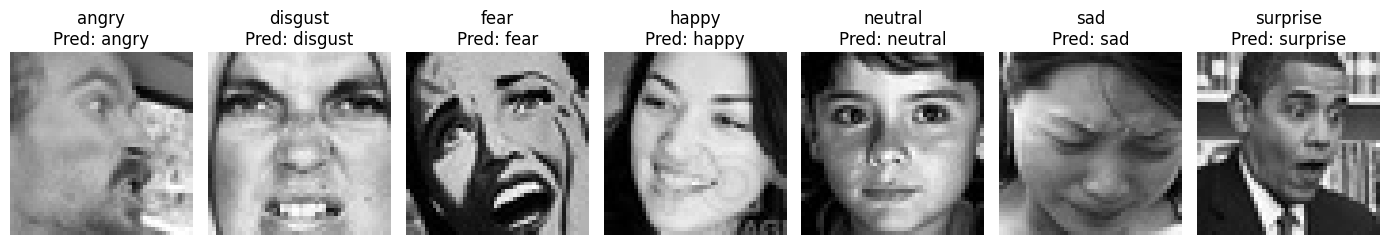

In [37]:
import matplotlib.pyplot as plt

# Sample 1 image per emotion
samples = validation.groupby('label').apply(lambda x: x.sample(1)).reset_index(drop=True)

# Create a single figure to show all emotions
plt.figure(figsize=(14, 5))

for i, row in enumerate(samples.itertuples()):
    img = ef(row.image)  # preprocess image
    pred_label = label_names[model.predict(img).argmax()]

    print(f"Original: {row.label}, Model prediction: {pred_label}")

    plt.subplot(1, len(samples), i+1)
    plt.imshow(img.reshape(48, 48), cmap='gray')
    plt.title(f"{row.label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


The model still has room for improvement, but for now, we will evaluate its accuracy.

In [38]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6437 - loss: 1.1837
Accuracy: 66.34%


I recommend using a different dataset and implementing a more advanced CNN model for improved performance.